In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl  # 버전확인용
import keras

In [6]:
print(tf.__version__)
print(keras.__version__)
print(mpl.__version__)
print(pd.__version__)
print(np.__version__)

1.15.2
2.3.1
3.2.1
1.0.3
1.18.4


### **데이터 불러오기**

In [7]:
train = pd.read_csv('bike_mod_tr.csv')
test = pd.read_csv('bike_mod_test.csv')
print(train.shape)
print(test.shape)

(10886, 19)
(6493, 16)


### **모델을 위한 데이터 선택**

In [0]:
input_col = ['hour','temp']
lbl_col = ['count']

In [0]:
X = train[input_col]      # 학습용(문제) 입력
y = train[lbl_col]        # 학습용(답) 출력
X_val = test[input_col]   # 나중에 결과 제출용 입력

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# 데이터 나누기 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
# 난수 발생 패턴을 0으로 결정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

## **딥러닝 구조 결정**
* **모델 생성**
  * Sequential() : 딥러닝 전체 틀. 딥러닝의 구조를 한층 한층 쉽게 쌓아올릴 수 있다.
  * model.add() : 1개층씩 추가. Sequential() 함수 선언 후, 신경망의 층을 쌓기 위해 model.add() 함수를 사용한다.
    * Dense() : 각 층에 세부내용 설정
    * input_dim : 입력층 노드의 수
    * activation : 활성화 함수 선언 (relu, sigmoid)

* **학습**
  * model.compile(평가함수, 최적화함수)
  * model.fit(학습)

* **예측**
  * predict

**optimizer 계보**

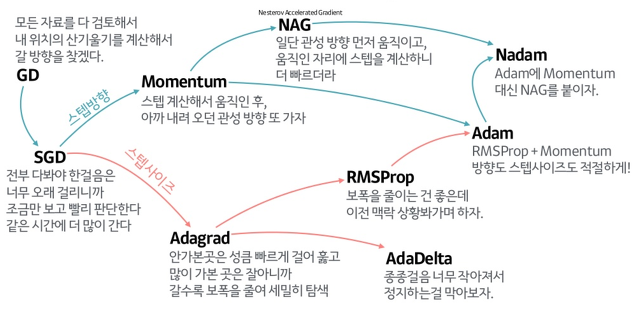

In [17]:
from IPython.display import Image
Image('993D383359D86C280D.png')

In [0]:
from keras.models import Sequential
from keras.layers import Dense

### **모델생성**

In [15]:
model = Sequential()
model.add(Dense(30, input_dim=2, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


**미니배치**
* 이미지를 하나씩 학습시키는 것보다 여러 개를 한꺼번에 학습시키는 쪽이 효과가 좋다.
* 하지만 전체를 다 하려면 많은 메모리와 높은 컴퓨터 성능이 필요하므로 일반적으로 데이터를 적당한 크기로 잘라서 학습시킨다.

### **학습**

In [18]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')   # loss: 오차 수정 방법
model.fit(X_train, y_train, epochs=20, batch_size=1)

Epoch 1/20
8164/8164 [==============================] - 8s 1ms/step - loss: 19262.7471
Epoch 2/20
8164/8164 [==============================] - 8s 1ms/step - loss: 19109.2641
Epoch 3/20
8164/8164 [==============================] - 9s 1ms/step - loss: 19097.8219
Epoch 4/20
8164/8164 [==============================] - 9s 1ms/step - loss: 19026.8977
Epoch 5/20
8164/8164 [==============================] - 8s 1ms/step - loss: 18912.5754
Epoch 6/20
8164/8164 [==============================] - 9s 1ms/step - loss: 18995.8948
Epoch 7/20
8164/8164 [==============================] - 10s 1ms/step - loss: 18872.5516
Epoch 8/20
8164/8164 [==============================] - 9s 1ms/step - loss: 18828.7354
Epoch 9/20
8164/8164 [==============================] - 9s 1ms/step - loss: 18780.2057
Epoch 10/20
8164/8164 [==============================] - 9s 1ms/step - loss: 18726.4054
Epoch 11/20
8164/8164 [==============================] - 9s 1ms/step - loss: 18784.6087
Epoch 12/20
8164/8164 [=================

**평가 확인**

In [19]:
model.evaluate(X_test, y_test)

2722/2722 [==============================] - 0s 35us/step


17911.02783526015

### **예측**

In [0]:
pred = model.predict(X_val)

### **답안지 작성**

In [0]:
sub = pd.read_csv("sampleSubmission.csv")
sub['count'] = pred
sub.loc[sub['count']<0, 'count'] = 0

In [0]:
sub.to_csv("nn_sub_0529.csv", index=False)